In [2]:
import pandas as pd 
from google.cloud import bigquery

#https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_jhu_csse&page=dataset&project=majestic-lead-418020&ws=!1m4!1m3!3m2!1sbigquery-public-data!2scovid19_jhu_csse
#usada debido a que es un estudio realizado por una universidad de ciencia computacional e ingeniería y ya que nuestra carrera es de ingeniería lo vi útl (se esta utilizando la tabla casos confirmados, "confirmed_cases").
#https://ukhsa-dashboard.data.gov.uk
#para el caso de la API ya que el anterior era un estudio americano opte por ver una comparación en otro continente.


#dentro del parentesis no toma el proyect client = bigquery.Client(proyect='bigquery-public-data.covid19_jhu_csse')
client = bigquery.Client()#('bigquery-public-data.covid19_jhu_csse')

#el primer slot se le debe colocar lo que sigue en bigquery-public-data.
dataset_ref = client.dataset("covid19_open_data", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)

In [4]:
client.list_rows(table, max_results=5).to_dataframe()

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,...,cumulative_vaccine_doses_administered_pfizer,new_persons_fully_vaccinated_moderna,cumulative_persons_fully_vaccinated_moderna,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,location_geometry
0,AR,2022-01-10,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)
1,AR,2020-08-29,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)
2,AR,2021-07-12,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)
3,AR,2021-09-24,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)
4,AR,2021-04-05,ChIJZ8b99fXKvJURqA_wKpl3Lz0,Q414,country/ARG,AR,Argentina,AR,ARG,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(-64 -34)


In [31]:
query = """
        SELECT date, new_confirmed
        FROM bigquery-public-data.covid19_open_data.covid19_open_data
        WHERE country_name = 'Chile'
        """

In [32]:
query_job = client.query(query)
chilean_cases = query_job.to_dataframe()
chilean_cases

,date,new_confirmed
0,2021-08-02,921
1,2020-05-18,2278
2,2020-05-14,2659
3,2021-12-04,2060
4,2021-10-29,14
...,...,...
359728,2021-10-04,9
359729,2022-04-15,9
359730,2020-09-11,9
359731,2021-01-04,9


In [36]:
query_with_CTE = """ 
                 WITH time AS 
                 (
                     SELECT DATE(date) AS date
                     FROM bigquery-public-data.covid19_open_data.covid19_open_data
                 )
                 GROUP BY date
                 ORDER BY date
                 """

In [37]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_with_CTE, job_config=safe_config)

NewCases_per_date = query_job.to_dataframe()

BadRequest: 400 Syntax error: Unexpected keyword GROUP at [7:18]; reason: invalidQuery, location: query, message: Syntax error: Unexpected keyword GROUP at [7:18]

Location: US
Job ID: c425f0b0-f3a2-42c2-9861-81ba1be86f21


<Axes: xlabel='date'>

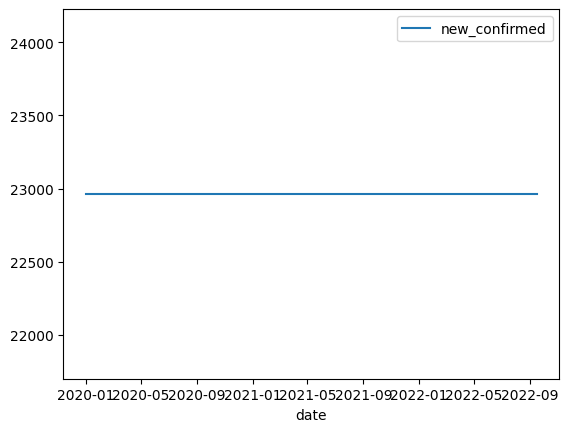

In [20]:
NewCases_per_day.set_index('date').plot()